In [1]:
import math
import numpy as np
import random

In [2]:
#J2 = lambda t,r,k,R0,J0, k1, Ip, Is: (-r*t+R0)^(-k1*(Ip*k-Is*k-1)/(k*r))*J0*(-k*r-r*t+R0)^(-k1/(k*r))/(R0^(-k1*(Ip*k-Is*k-1)/(k*r))*(-k*r+R0)^(-k1/(k*r)))
J2 = lambda k,r,R,J0, k1, Ip, Is: (R)**(-k1*(Ip*k-Is*k-1)/(k*r))*J0*(-k*r+R)**(-k1/(k*r))/(R0**(-k1*(Ip*k-Is*k-1)/(k*r))*(R)**(-k1/(k*r)))

J = lambda P, deltaT: math.exp(.5*k1*P*deltaT)

prob = lambda a, b, J: 1/(1 + a*math.exp(-J*b))
eval_w = lambda P, ave_w_sum, ave_w_dev : np.random.normal((ave_w_sum + (ave_w_sum - P)) , 
                                                           math.sqrt(ave_w_dev))# *J,#  пропорционально тек. состоянию и прогнозу на будущее -- сколько нужно накопить 
# -- тоже эмоциональная оценка количества благ *e*pi

P_reg=30
k= 0.23
R0= 200
k1= 1
a= 100
b= 0.17
ave_w_sum= 650
ave_w_dev=70
J0= 20
Ip= 3
Is=5

T_max = 100
P_0 = 1000  # на какую сумму закуплен запас товара

# параметры *этого* агента
#P_reg = 200 # расход за итерацию (единицу времени) -- итерация==день
#k = 2
#R0 = 20000
#k1 = 1
#a = 100
#b = .1
#ave_w_sum = 500 # средний чек?
#ave_w_dev = 300 # sum +- dev
#deltaT = 1 # TODO
#J0=1
#Ip=2
#Is=1

P=P_0 # состояние агента в фикс. категории
trans_seq = []
for t in range(T_max):
    P -= P_reg
    # есть тек. сост. Р, прогноз, на сколько его  хватит -- время (длина интервала) до дедлайна, 
    # доступность привычных средств реализации потребности -- прогноз времени на поиск решения?
    # -- это влияет на эмоции
    J_t = J2(k,P_reg,P,J0, k1, Ip, Is)#J2(t,P_reg,k,R0,J0, k1, Ip, Is) #J(P, deltaT)
    p = prob(a,b,J_t)
    if random.random() < p: # если эмоций достаточно, совершаем покупку (w, t, cat) - cat фикс, t==t, w ~ J?...
        w = eval_w(P, ave_w_sum, ave_w_dev) # вычисляем пропорционально эмоциям
        P += w
        trans_seq.append([t, w, P])
    else:
        trans_seq.append([t, 0, P])
print(trans_seq)

[[0, 344.9688241819074, 1314.9688241819074], [1, 14.406004708595757, 1299.374828890503], [2, 0, 1269.374828890503], [3, 0, 1239.374828890503], [4, 84.43907400826535, 1293.8139028987684], [5, 0, 1263.8139028987684], [6, 0, 1233.8139028987684], [7, 96.89128444299531, 1300.7051873417638], [8, 0, 1270.7051873417638], [9, 72.56559068193293, 1313.2707780236967], [10, 9.0089559593263, 1292.279733983023], [11, 0, 1262.279733983023], [12, 78.8333191013807, 1311.1130530844039], [13, 12.595358926230482, 1293.7084120106344], [14, 29.07685162840223, 1292.7852636390367], [15, 33.99383070723251, 1296.7790943462692], [16, 25.499880519475578, 1292.2789748657447], [17, 29.890454995731652, 1292.1694298614764], [18, 0, 1262.1694298614764], [19, 65.28824226039318, 1297.4576721218696], [20, 0, 1267.4576721218696], [21, 0, 1237.4576721218696], [22, 0, 1207.4576721218696], [23, 123.78324074963132, 1301.2409128715008], [24, 0, 1271.2409128715008], [25, 0, 1241.2409128715008], [26, 89.89649708190183, 1301.13740

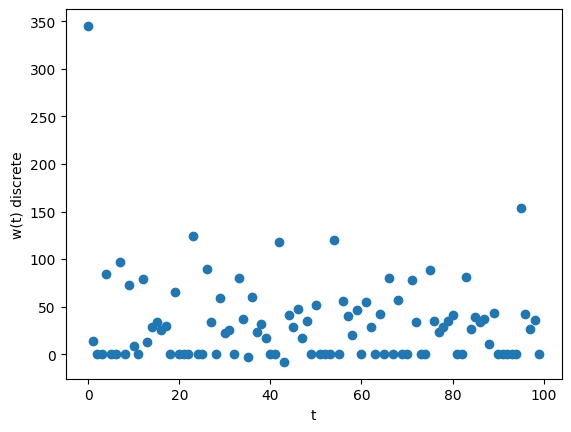

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
x = [tr[0] for tr in trans_seq]
y = [tr[1] for tr in trans_seq] #zip(*trans_seq)[:,1]
# z = trans_seq[:,2]

plt.scatter(x,y)
plt.xlabel("t")
plt.ylabel("w(t) discrete")
#plt.savefig("w_t.png", dpi=300)
plt.show()

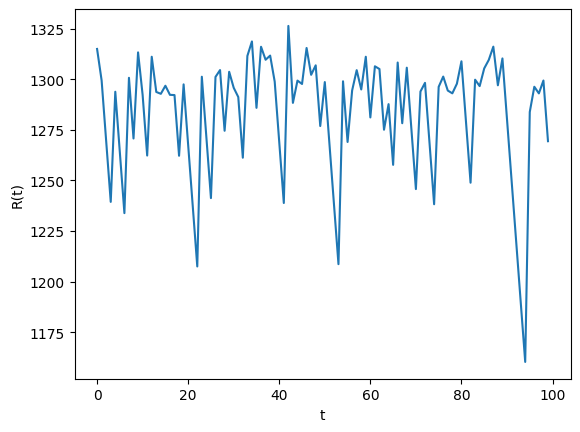

In [6]:
x = [tr[0] for tr in trans_seq]
y = [tr[2] for tr in trans_seq] #zip(*trans_seq)[:,1]
# z = trans_seq[:,2]

plt.plot(x,y)
plt.xlabel("t")
plt.ylabel("R(t)")
#plt.savefig("R_t.png", dpi=300)
plt.show()

In [5]:
print(len(list(filter(lambda t:(t[1]>0), trans_seq))))


57
